In [1]:
import json

# Open the JSON file
with open('data\\vimmsd-train.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)


In [2]:
import unicodedata

def has_emoji(text):
    emos = []
    for char in text:
        # Check if the character is an emoji
        if unicodedata.category(char).startswith('So'):
            emos += char 
    return len(emos) > 0, set(emos)


In [3]:
text1 = """THỜI ĐẠI TIU-ĐÂY lên ngôi❗️ Chim chuột với chồng bạn ngay sau lưng!
Truy tìm chị vợ áo hoa trong video và muốn nói cho chị rằng:” Chị ơi bạn chị cả chồng chị nắm tay nhau sau lưng chị kìa❗️❗️
Chị chị em em cây cà lem cũng muốn g/i/ậ/t!"""

text2 = "Cô ấy trên mạng vs cô ấy ngoài đời =)))"
text3 = "Để kao giữ xe hắn lại cho,mài đi báo cảnh sát đi 😆😄."

print(has_emoji(text1))  # Output: True
print(has_emoji(text2))  # Output: False
print(has_emoji(text3))  # Output: False


(True, {'❗'})
(False, set())
(True, {'😄', '😆'})


In [4]:
icon_idx = []
label_map = {
    "not-sarcasm": 0,
    "multi-sarcasm": 1,
    "image-sarcasm": 2,
    "text-sarcasm": 3
}
count_label_emoji = {
    "not-sarcasm": 0,
    "multi-sarcasm": 0,
    "image-sarcasm": 0,
    "text-sarcasm": 0
}
map_icon = {
    "not-sarcasm": {},
    "multi-sarcasm": {},
    "image-sarcasm": {},
    "text-sarcasm": {}
}
for i in range(len(data)):
    check, emos = has_emoji(data[str(i)]['caption'])
    label = data[str(i)]['label']
    if check:
        count_label_emoji[label] += 1
        for emo in emos:
            map_icon[label][emo] = map_icon[label].get(emo, 0) + 1

In [72]:
# export to json file, make the json exported file can store emoji
with open('icon.json', 'w', encoding='utf-8') as f:
    json.dump(map_icon, f, ensure_ascii=False, indent=4)

<BarContainer object of 100 artists>

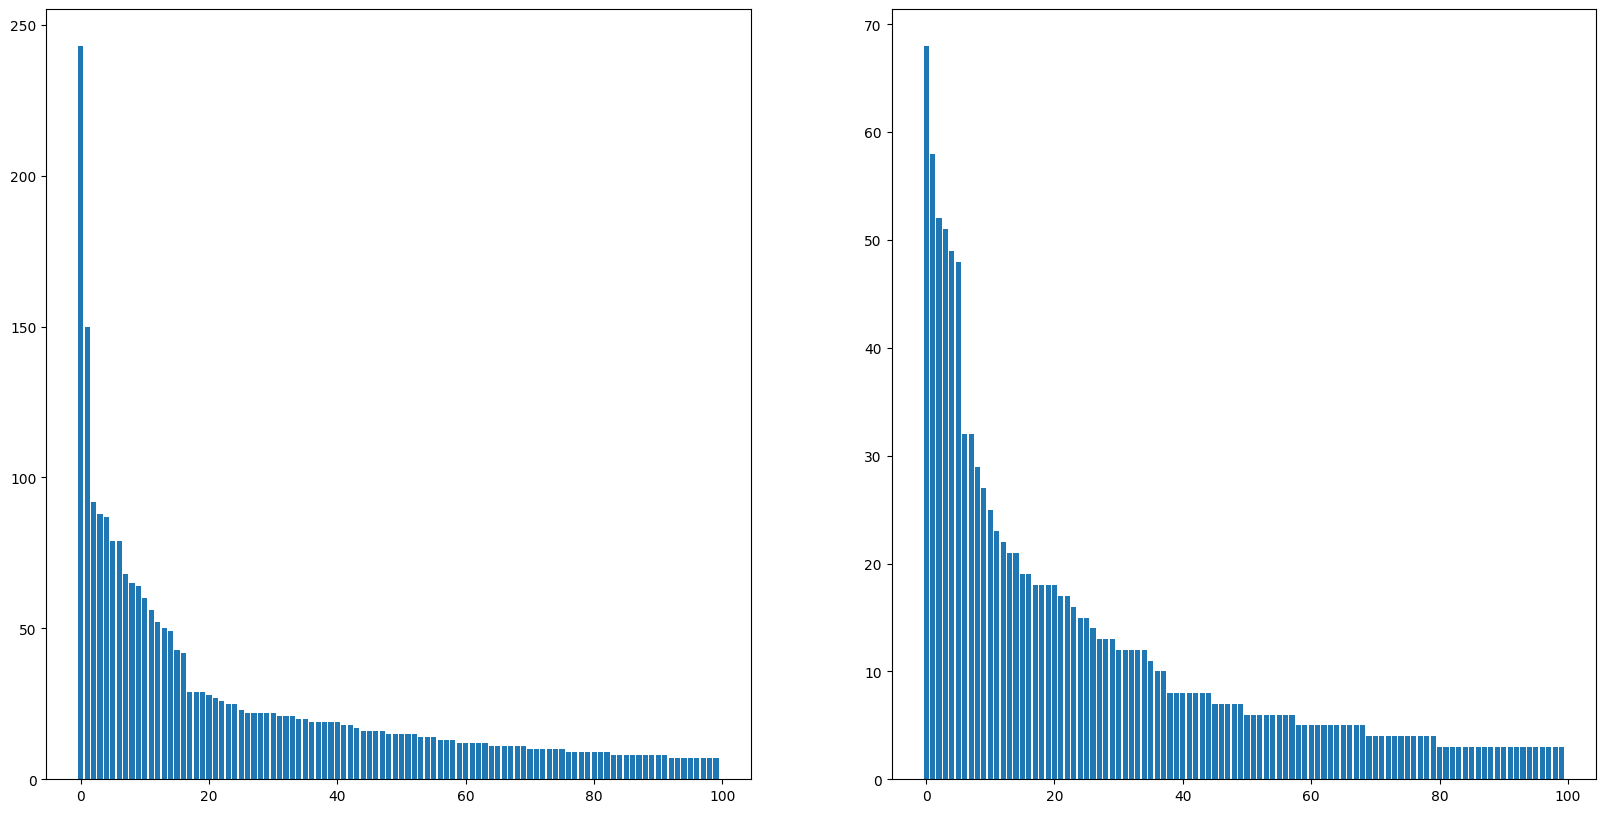

In [6]:
# plot the values 
import matplotlib.pyplot as plt
import numpy as np
# subplot for not and multi sarcasm 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
a = sorted(map_icon["not-sarcasm"].values(),reverse=True)[:100]
plt.bar(range(len(a)), a)

plt.subplot(1, 2, 2)
b = sorted(map_icon["multi-sarcasm"].values(),reverse=True)[:100]
plt.bar(range(len(b)), b)

Choose 25 as threshold for not sarcasm and 10 for multi-sarcasm

In [7]:
emoji_not_sarcasm = []
for k,v in map_icon["not-sarcasm"].items():
    if v >= 25:
        emoji_not_sarcasm.append(k)
        
emoji_multi_sarcasm = []
for k,v in map_icon["multi-sarcasm"].items():
    if v >= 10:
        emoji_multi_sarcasm.append(k)

In [8]:
emoji_list = list(set(emoji_multi_sarcasm).union(set(emoji_not_sarcasm)))
len(emoji_list)

45

In [9]:
map_not_sarcasm = {}
map_sarcasm = {}
for emo in emoji_list:
    map_not_sarcasm[emo] = 0
    map_sarcasm[emo] = 0

In [10]:
for i in range(len(data)):
    check, emos = has_emoji(data[str(i)]['caption'])
    label = data[str(i)]['label']
    if check:
        for emo in emos:
            if(emo in emoji_list):
                if(label=="not-sarcasm"):
                    map_not_sarcasm[emo] += 1
                else: map_sarcasm[emo]+=1

In [20]:
count = {}
for id,d in data.items():
    label = d["label"]
    if label not in count:
        count[label] = 0
    count[label] += 1
    
count_label_emoji, count

({'not-sarcasm': 2063,
  'multi-sarcasm': 1138,
  'image-sarcasm': 113,
  'text-sarcasm': 23},
 {'multi-sarcasm': 4224,
  'not-sarcasm': 6062,
  'image-sarcasm': 442,
  'text-sarcasm': 77})

In [13]:
number_not_sarcasm = count["not-sarcasm"]
number_sarcasm = len(data) - number_not_sarcasm
number_not_sarcasm, number_sarcasm

(6062, 4743)

In [14]:
# save to a pandas dataframe
import pandas as pd

# 3 cols, the first is emoji, the second is the number of emoji in not sarcasm, the third is the number of emoji in sarcasm

df = pd.DataFrame(columns=["emoji", "not-sarcasm", "sarcasm"])
df["emoji"] = emoji_list
df["not-sarcasm"] = [map_not_sarcasm[emo] for emo in emoji_list]
df["sarcasm"] = [map_sarcasm[emo] for emo in emoji_list]
df["percentage_not_sarcasm"] = np.array(df["not-sarcasm"])/number_not_sarcasm*100
df["percentage_sarcasm"] = np.array(df["sarcasm"])/number_sarcasm*100
# for emo in emoji_list:
    # df = df.append({"emoji": emo, "not-sarcasm": map_not_sarcasm[emo], "sarcasm": map_sarcasm[emo]}, ignore_index=True)

In [15]:
df

,emoji,not-sarcasm,sarcasm,percentage_not_sarcasm,percentage_sarcasm
0,🥰,92,34,1.517651,0.716846
1,🇳,65,2,1.072253,0.042167
2,✅,23,12,0.379413,0.253004
3,😃,11,18,0.181458,0.379507
4,😕,7,13,0.115473,0.274088
5,😇,8,26,0.131970,0.548176
6,📍,25,1,0.412405,0.021084
7,☺,7,22,0.115473,0.463841
8,🔥,150,23,2.474431,0.484925
9,🤔,19,15,0.313428,0.316256


In [74]:
# export the emoji list to a file
with open("emoji_list.txt", "w") as f:
    for emo in emoji_list:
        f.write(emo)
        f.write("\n")

In [16]:
import unicodedata

# char = '❤'
# name = unicodedata.name(char)
# print(name)
for icon in emoji_list:
    print(icon, unicodedata.name(icon))

🥰 SMILING FACE WITH SMILING EYES AND THREE HEARTS
🇳 REGIONAL INDICATOR SYMBOL LETTER N
✅ WHITE HEAVY CHECK MARK
😃 SMILING FACE WITH OPEN MOUTH
😕 CONFUSED FACE
😇 SMILING FACE WITH HALO
📍 ROUND PUSHPIN
☺ WHITE SMILING FACE
🔥 FIRE
🤔 THINKING FACE
😏 SMIRKING FACE
❤ HEAVY BLACK HEART
😆 SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES
😎 SMILING FACE WITH SUNGLASSES
😍 SMILING FACE WITH HEART-SHAPED EYES
😉 WINKING FACE
🚨 POLICE CARS REVOLVING LIGHT
🎉 PARTY POPPER
😞 DISAPPOINTED FACE
😅 SMILING FACE WITH OPEN MOUTH AND COLD SWEAT
🙃 UPSIDE-DOWN FACE
✨ SPARKLES
😂 FACE WITH TEARS OF JOY
🙁 SLIGHTLY FROWNING FACE
😮 FACE WITH OPEN MOUTH
👇 WHITE DOWN POINTING BACKHAND INDEX
🙏 PERSON WITH FOLDED HANDS
🥹 FACE HOLDING BACK TEARS
😘 FACE THROWING A KISS
😀 GRINNING FACE
😌 RELIEVED FACE
🤡 CLOWN FACE
🤣 ROLLING ON THE FLOOR LAUGHING
🇻 REGIONAL INDICATOR SYMBOL LETTER V
👍 THUMBS UP SIGN
⚠ WARNING SIGN
♥ BLACK HEART SUIT
👉 WHITE RIGHT POINTING BACKHAND INDEX
🥳 FACE WITH PARTY HORN AND PARTY HAT
🐧 PENGUIN
😢 CR

In [39]:
# hash tag
# return the whole hash tags
def has_hash_tag(text):
    split_text = text.split()
    res = []
    for t in split_text:
        if t[0] == "#":
           res.append(t) 
    return len(res)>0, res
# count how many hash tag in each label

count_label_hash_tag = {
    "not-sarcasm": 0,
    "multi-sarcasm": 0,
    "image-sarcasm": 0,
    "text-sarcasm": 0
}
map_hash_tag = {
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
map_hash_tag_len={
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
for i in range(len(data)):
    check, hash_tags = has_hash_tag(data[str(i)]['caption'])
    label = data[str(i)]['label']
    map_hash_tag[label]+=(hash_tags)
    map_hash_tag_len[label].append(len(hash_tags))
    if check:
        count_label_hash_tag[label] += 1

count_label_hash_tag

{'not-sarcasm': 1230,
 'multi-sarcasm': 1007,
 'image-sarcasm': 166,
 'text-sarcasm': 17}

In [69]:
# write the function to count frequency of number in a list python 
def count_freq(arr):
    freq = {}
    for item in arr:
        if item not in freq:
            freq[item] = 0
        freq[item] += 1
    # return sorted map
    return freq


In [70]:
# count the number of each len_hashtag
print("not-sarcasm", count_freq(map_hash_tag_len["not-sarcasm"]))
print("multi-sarcasm", count_freq(map_hash_tag_len["multi-sarcasm"]))
print("image-sarcasm", count_freq(map_hash_tag_len["image-sarcasm"]))
print("text-sarcasm", count_freq(map_hash_tag_len["text-sarcasm"]))

not-sarcasm {0: 4832, 1: 502, 2: 258, 3: 273, 5: 63, 4: 96, 6: 20, 8: 3, 9: 6, 11: 2, 7: 7}
multi-sarcasm {0: 3217, 1: 732, 3: 106, 4: 41, 5: 15, 2: 105, 8: 4, 6: 2, 9: 1, 12: 1}
image-sarcasm {0: 276, 3: 46, 1: 90, 2: 16, 4: 12, 6: 1, 9: 1}
text-sarcasm {0: 60, 2: 4, 3: 8, 4: 1, 1: 3, 5: 1}


In [54]:
# hidden icon

def has_hidden_icon(text):
    # hidden icon is the icon that is not in the unicode, but usually start with ":" and follow by a character
    # for example: :v, :), :(, :))) 
    split_text = text.split()
    res = []
    for t in split_text:
        if t[0] == ":" and len(t) > 1:
            res.append(t)
    return len(res)>0, res

count_label_hidden_icon = {
    "not-sarcasm": 0,
    "multi-sarcasm": 0,
    "image-sarcasm": 0,
    "text-sarcasm": 0
}
map_hidden_icon = {
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
map_hidden_icon_len={
    "not-sarcasm": [],
    "multi-sarcasm": [],
    "image-sarcasm": [],
    "text-sarcasm": []
}
for i in range(len(data)):
    check, hidden_icons = has_hidden_icon(data[str(i)]['caption'])
    label = data[str(i)]['label']
    map_hidden_icon[label]+=(hidden_icons)
    map_hidden_icon_len[label].append(len(hidden_icons))
    if check:
        count_label_hidden_icon[label] += 1


In [71]:
count_label_hidden_icon

{'not-sarcasm': 340,
 'multi-sarcasm': 362,
 'image-sarcasm': 24,
 'text-sarcasm': 8}

In [56]:
# count the number of each len_hashtag
print("not-sarcasm", count_freq(map_hidden_icon["not-sarcasm"]))
print("multi-sarcasm", count_freq(map_hidden_icon["multi-sarcasm"]))
print("image-sarcasm", count_freq(map_hidden_icon["image-sarcasm"]))
print("text-sarcasm", count_freq(map_hidden_icon["text-sarcasm"]))

not-sarcasm {':)))': 56, ':))': 79, ':))))': 12, ':(((': 7, ':v': 94, ':3': 19, ':&lt;': 7, ':((((((': 2, ':))))))': 1, ':d': 4, ':-SS': 1, ':x': 36, ':(((((((': 1, ':((((((((((': 1, ':****': 1, ':-jjjjjjjjjjjjjjjj': 2, ':((((((((((((((': 1, ':xxxx': 9, ':.': 6, ':(((((((((((': 5, ':xxxxxxxxx': 2, ':XXXXX': 1, ':-jjjjjjjjj': 2, ':XXXXXXXXXXXXXXX': 1, ':xxx': 2, ':-ss': 1, ':)))))))': 1, ':-jjjjj': 2, ':XXXXXXX': 4, ':xxxxxx': 5, ':xx': 4, ':Xxxxxxxxxx': 4, ':****************************': 4, ':XXXX': 5, ':-jjjjjjjj': 1, ':xxxxxxxxxxxxxxx': 1, ':X': 11, ':Xxxxxxxxxxxxx': 1, ':xxxxx': 3, ':-jjjjjjjjjjj': 1, ':xxxxxxxxxxxxxxxx': 1, ':-***********': 1, ':^)': 2, ':&gt;': 1, ':xxxxxxxxxxxx': 1, ':xxxxxxxxxxx': 1, ':xxxxxxxx': 1, ':"&gt;': 1, ':-&lt;': 1, ':((((((((((((((((((((': 1, ':Xxxxxxxxxxxxxxxxxx': 1, ':V': 2, ':-jjjjjjjjjjjj': 1, ':-JJJJJJJJJ': 1, ':((((': 1, ':-?': 2, ':-j': 2, ':)))))': 2, ':(((((((((((((((': 4, ':********': 4, ':~': 1, ':xxxxxxxxxxxxxx': 1, ':((': 2}
multi-sarcasm